In [2]:
%matplotlib inline
from qutip import * 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

We follow Leonardo Banchi et al 2018 New J. Phys. 20 123030.

Let's consider the noisy evolution of a two-level system. We consider the Hamiltonian 
$$H= \omega\sigma_z $$ and a jump operator $\sigma_{-}$ with time dependent decay rate
$$\gamma(t) = 2\gamma_0\lambda\frac{\sinh(\eta t/2)}{\eta \cosh(\eta t/2) + \lambda \sinh(\eta t/2)}$$
Let's assume that we observe $\{\sigma_x,\sigma_y,\sigma_z\}$ for different initial states over time and we try to predict that for an unseen quantum state.

We follow Leonardo Banchi et al 2018 New J. Phys. 20 123030.

Let's consider the noisy evolution of a two-level system. We consider the Hamiltonian 
$$H= \omega\sigma_z $$ and a jump operator $\sigma_{-}$ with time dependent decay rate
$$\gamma(t) = at$$
Let's assume that we observe $\{\sigma_x,\sigma_y,\sigma_z\}$ for different initial states over time and we try to predict that for an unseen quantum state.

In [2]:
### Parameters 
ω = 1
#λ = 2
#γ0 = 0.5

In [3]:
### Operators and initial states
ham = ω*sigmaz()
cop = destroy(2)
d0=1
d1=1
d2=1

NameError: name 'ω' is not defined

In [4]:
print(cop)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


In [5]:
def gamma_t(t,args):
    return d1*t

In [6]:
cop_all = [[cop,gamma_t]]

In [49]:
t_list = np.arange(0,10,0.1)
#t_list_long = np.arange(0,30,0.1)
print(t_list.shape)

(100,)


In [8]:
n_train = 33
n_test = n_train // 3
n_test_long = 2*n_test

In [9]:
### Time evolution - Training
def train(s):
    global d0,d1,d2
    d1=s[0]
    exp_train = []
    exp_test = []    
    exp_test_long = []
    for i in tqdm(range(n_train)):
        ψ0 = rand_ket(2)
        resTI = mesolve(ham,ψ0,t_list,cop_all,[sigmax(),sigmay(),sigmaz()])
        exp_train.append(resTI.expect)
    return exp_train

### Printing train data

## Training data visulization

In [10]:
for i in  np.random.random((10,1)):
    print(i)

[0.93034534]
[0.22123708]
[0.31586092]
[0.23404443]
[0.41422465]
[0.62750189]
[0.88144797]
[0.03952232]
[0.40197787]
[0.56346369]


In [11]:
alpha=1
def X_train(n):
    l=np.random.random((n,alpha))
    s=[]
    for i in l:
        i=i.tolist()
        s.append(train(i))
    return l, s



In [12]:
l,s=X_train(200)

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 29.61it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 30.29it/s]


In [13]:
def y(l):
    g=[]
    for i in l:
        for j in range(n_train):
            g.append(i)
    return np.asarray(g)

RNN and window functions

# Initializing LSTM models

In [14]:
from pandas import DataFrame
from pandas import concat
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten

from keras import regularizers

Using TensorFlow backend.


In [15]:
s=np.asarray(s)
print(s.shape)
s=s.reshape(200*33,3,t_list.shape[0])
np.transpose(s, (0, 2, 1)).shape

(200, 33, 3, 100)


(6600, 100, 3)

In [16]:
X1_train=np.asarray(s).reshape(6600,t_list.shape[0],3)
Y_train=y(l).reshape(-1,alpha)




print(X1_train.shape)
print(Y_train.shape)


#print(X1_test.shape)
#print(Y_test.shape)

(6600, 100, 3)
(6600, 1)


In [17]:
from sklearn.utils import shuffle

X1_train, Y_train = shuffle(X1_train, Y_train)
#X1_test, Y_test = shuffle(X1_test, Y_test)

batch_shape = (N of time series in a batch, the length of time series, N of features)

Input shape 3D tensor with shape (batch_size, timesteps, input_dim).

In [18]:
# Define train LSTM model
nb_compon = 1
model = Sequential()
model.add(LSTM(50,  stateful = False,input_shape = (t_list.shape[0], 3)))#input_shape=(None,nb_compon),
model.add(Dense(30, kernel_regularizer=regularizers.l2(0.001),
               activity_regularizer=regularizers.l2(0.001),
               bias_regularizer=regularizers.l2(0.001)))
model.add(Dense(alpha))

Train on 4950 samples, validate on 1650 samples
Epoch 1/40
4950/4950 [==============================] - ETA: 38s - loss: 0.12 - ETA: 21s - loss: 0.36 - ETA: 14s - loss: 0.32 - ETA: 11s - loss: 0.31 - ETA: 9s - loss: 0.3214 - ETA: 8s - loss: 0.327 - ETA: 6s - loss: 0.321 - ETA: 5s - loss: 0.304 - ETA: 5s - loss: 0.288 - ETA: 4s - loss: 0.280 - ETA: 3s - loss: 0.274 - ETA: 3s - loss: 0.269 - ETA: 2s - loss: 0.266 - ETA: 2s - loss: 0.263 - ETA: 1s - loss: 0.259 - ETA: 1s - loss: 0.256 - ETA: 0s - loss: 0.253 - ETA: 0s - loss: 0.251 - ETA: 0s - loss: 0.248 - 8s 2ms/step - loss: 0.2469 - val_loss: 0.1948
Epoch 2/40
4950/4950 [==============================] - ETA: 5s - loss: 0.182 - ETA: 5s - loss: 0.178 - ETA: 4s - loss: 0.178 - ETA: 4s - loss: 0.182 - ETA: 4s - loss: 0.182 - ETA: 4s - loss: 0.180 - ETA: 3s - loss: 0.179 - ETA: 3s - loss: 0.179 - ETA: 3s - loss: 0.177 - ETA: 3s - loss: 0.176 - ETA: 2s - loss: 0.174 - ETA: 2s - loss: 0.173 - ETA: 2s - loss: 0.171 - ETA: 1s - loss: 0.171 - E

4950/4950 [==============================] - ETA: 5s - loss: 0.199 - ETA: 5s - loss: 0.185 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.149 - ETA: 4s - loss: 0.146 - ETA: 4s - loss: 0.136 - ETA: 3s - loss: 0.134 - ETA: 3s - loss: 0.131 - ETA: 3s - loss: 0.127 - ETA: 2s - loss: 0.127 - ETA: 2s - loss: 0.123 - ETA: 2s - loss: 0.120 - ETA: 1s - loss: 0.117 - ETA: 1s - loss: 0.116 - ETA: 1s - loss: 0.115 - ETA: 1s - loss: 0.114 - ETA: 0s - loss: 0.113 - ETA: 0s - loss: 0.111 - ETA: 0s - loss: 0.110 - 6s 1ms/step - loss: 0.1101 - val_loss: 0.0948
Epoch 30/40
4950/4950 [==============================] - ETA: 5s - loss: 0.094 - ETA: 5s - loss: 0.087 - ETA: 4s - loss: 0.093 - ETA: 4s - loss: 0.090 - ETA: 4s - loss: 0.092 - ETA: 3s - loss: 0.090 - ETA: 3s - loss: 0.091 - ETA: 3s - loss: 0.090 - ETA: 3s - loss: 0.089 - ETA: 2s - loss: 0.088 - ETA: 2s - loss: 0.089 - ETA: 2s - loss: 0.087 - ETA: 1s - loss: 0.087 - ETA: 1s - loss: 0.087 - ETA: 1s - loss: 0.086 - ETA: 1s - loss: 0.085 - ETA: 0s - lo

Text(0.5, 0, 'epoch')

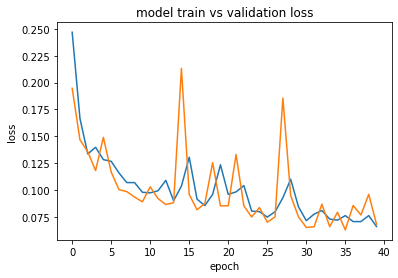

In [32]:
model.compile("adam", loss="mae")
history = model.fit(X1_train, Y_train ,batch_size=256 ,validation_split=0.25,epochs=40)
#tf.keras.metrics.mean_absolute_error(model.predict(X1_test).reshape(-1,),Y_test).numpy()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

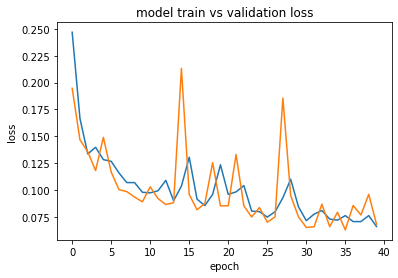

In [33]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [23]:
import tensorflow as tf 

In [34]:
def X_test(n):
    l=np.random.random((n,alpha))
    s=[]
    for i in l:
        i=i.tolist()
        s.append(train(i))
    return l, s

l_test,s_test=X_test(2)

X1_test=np.transpose(np.asarray(s_test).reshape(-1,3,t_list.shape[0]), (0, 2, 1))
Y_test=y(l_test).reshape(-1,)



100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 59.17it/s]


In [35]:
X1_test.shape

(66, 100, 3)

Text(0.5, 0, 't')

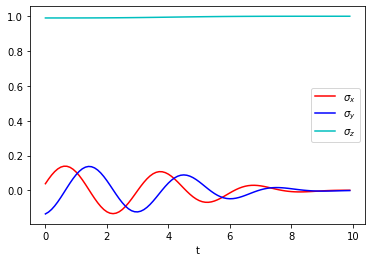

In [36]:
rr=35
plt.plot(t_list, np.array(X1_test)[rr][:,0],label=r'$\sigma_x$',color='r')
plt.plot(t_list, np.array(X1_test)[rr][:,1],label=r'$\sigma_y$',color='b')
plt.plot(t_list, np.array(X1_test)[rr][:,2],label=r'$\sigma_z$',color='c')
plt.legend()
plt.xlabel('t')




# one example demonstration 

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 42.12it/s]


[[0.8887094]]


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 47.51it/s]


[[0.90856934]]


Text(0.5, 0, 't')

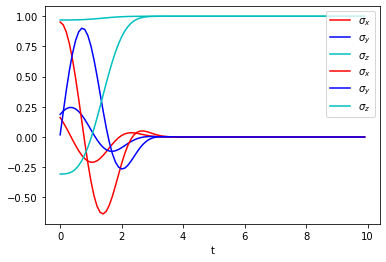

In [37]:
exp_train=train([0.874408])
plt.plot(t_list, np.array(exp_train)[0][0],label=r'$\sigma_x$',color='r')
plt.plot(t_list, np.array(exp_train)[0][1],label=r'$\sigma_y$',color='b')
plt.plot(t_list, np.array(exp_train)[0][2],label=r'$\sigma_z$',color='c')

s=np.array(exp_train)[0].reshape(1,t_list.shape[0],3)
print(model.predict(s))

exp_train=train([0.874408])
plt.plot(t_list, np.array(exp_train)[0][0],label=r'$\sigma_x$',color='r')
plt.plot(t_list, np.array(exp_train)[0][1],label=r'$\sigma_y$',color='b')
plt.plot(t_list, np.array(exp_train)[0][2],label=r'$\sigma_z$',color='c')

s=np.array(exp_train)[0].reshape(1,t_list.shape[0],3)
print(model.predict(s))

plt.legend()



plt.xlabel('t')


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.12it/s]


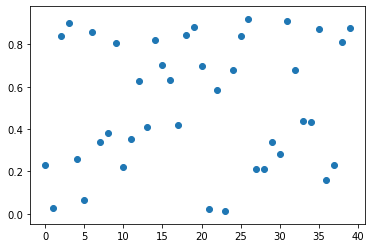

In [42]:
number=40
q=[]
u=np.random.random(number)
for i in u:
    exp_train=train([i])
    s=np.array(exp_train)[0].reshape(1,t_list.shape[0],3)
    q.append(model.predict(s))
    
plt.scatter(np.arange(0,number),q)

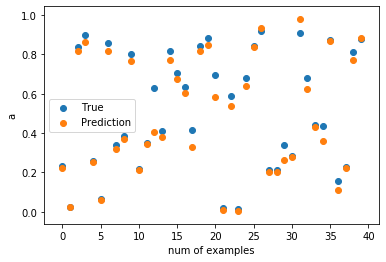

In [65]:
plt.scatter(np.arange(0,number),q,label='True')    
plt.scatter(np.arange(0,number),u, label='Prediction')

plt.xlabel("num of examples")
plt.ylabel('a')
plt.legend()




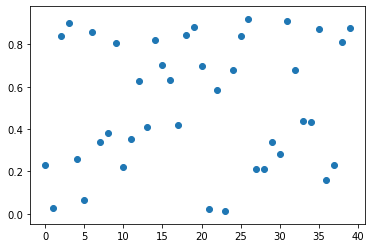

In [45]:
plt.scatter(np.arange(0,number),q)    


In [46]:
np.power(2, 3)

8

# non trivial example

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.45it/s]


array([[0.16885951]], dtype=float32)

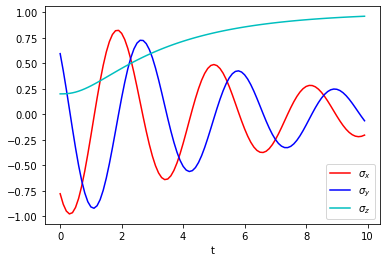

In [59]:
### Parameters 
exp_train = []
ω = 1
λ = 2
γ0 = 0.5
### Operators and initial states
ham = ω*sigmaz()
cop = destroy(2)
def gamma_t(t,args):
    η = np.sqrt(λ**2-2*γ0*λ)
    return 2*γ0*λ*np.sinh(η*t/2)/(η*np.cosh(η*t/2)+λ*np.sinh(η*t/2))
cop_all = [[cop,gamma_t]]

for i in tqdm(range(n_train)):
    ψ0 = rand_ket(2)
    resTI = mesolve(ham,ψ0,t_list,cop_all,[sigmax(),sigmay(),sigmaz()])
    exp_train.append(resTI.expect)
    
    
plt.plot(t_list, np.array(exp_train)[0][0],label=r'$\sigma_x$',color='r')
plt.plot(t_list, np.array(exp_train)[0][1],label=r'$\sigma_y$',color='b')
plt.plot(t_list, np.array(exp_train)[0][2],label=r'$\sigma_z$',color='c')
plt.legend()
plt.xlabel('t')

s=np.array(exp_train[0]).reshape(1,t_list.shape[0],3)
model.predict(s)

In [53]:
model.save('1106_con_positive_suc.h')

## Evaluating LSTM model 

# Define test LSTM model
nb_compon = 3
model_test = Sequential()
model_test.add(LSTM(50, input_shape=(None,nb_compon), stateful = True, batch_size=1))
model_test.add(Dense(30, kernel_regularizer=regularizers.l2(0.001),
               activity_regularizer=regularizers.l2(0.001),
               bias_regularizer=regularizers.l2(0.001)))
model_test.add(Dense(nb_compon))


In [54]:
ψ0 = rand_ket(2)

In [55]:
### Time evolution - Training
def extrain(s,ψ0):
    global d0,d1,d2
    d1=s[0]
    exp_train = []
    exp_test = []    
    exp_test_long = []
    for i in tqdm(range(n_train)):
        resTI = mesolve(ham,ψ0,t_list,cop_all,[sigmax(),sigmay(),sigmaz()])
        exp_train.append(resTI.expect)
    return exp_train

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 34.68it/s]


array([[0.17219737]], dtype=float32)

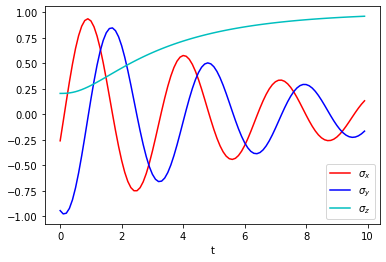

In [61]:
### Parameters 
exp_train = []
ω = 1
λ = 2
γ0 = 0.5
### Operators and initial states
ham = ω*sigmaz()
cop = destroy(2)
def gamma_t(t,args):
    η = np.sqrt(λ**2-2*γ0*λ)
    return 2*γ0*λ*np.sinh(η*t/2)/(η*np.cosh(η*t/2)+λ*np.sinh(η*t/2))
cop_all = [[cop,gamma_t]]

for i in tqdm(range(n_train)):
    ψ0 = rand_ket(2)
    resTI = mesolve(ham,ψ0,t_list,cop_all,[sigmax(),sigmay(),sigmaz()])
    exp_train.append(resTI.expect)
    
    
plt.plot(t_list, np.array(exp_train)[0][0],label=r'$\sigma_x$',color='r')
plt.plot(t_list, np.array(exp_train)[0][1],label=r'$\sigma_y$',color='b')
plt.plot(t_list, np.array(exp_train)[0][2],label=r'$\sigma_z$',color='c')
plt.legend()
plt.xlabel('t')

s=np.array(exp_train[0]).reshape(1,t_list.shape[0],3)
model.predict(s)







In [1]:
def gamma(t):
    η = np.sqrt(λ**2-2*γ0*λ)
    return 2*γ0*λ*np.sinh(η*t/2)/(η*np.cosh(η*t/2)+λ*np.sinh(η*t/2))

def fit_t(s,t):
    d1=s[0]
    return d1*t

t=t_list
plt.plot(t, gamma(t))
#plt.plot(t, fit_t(model.predict(s).reshape(-1),t))


NameError: name 't_list' is not defined